In [1]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import preprocessing
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('Advertising.csv').drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
x = df.drop('Sales', axis=1)
y = df['Sales']

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lreg = LinearRegression()
lreg.fit(x_scaled, y)

LinearRegression()

In [5]:
coef_dict = dict(zip(df.columns[:-1], np.transpose(lreg.coef_)))
predictors, coefficients = list(zip(*sorted(coef_dict.items(), key=lambda x: x[1])))

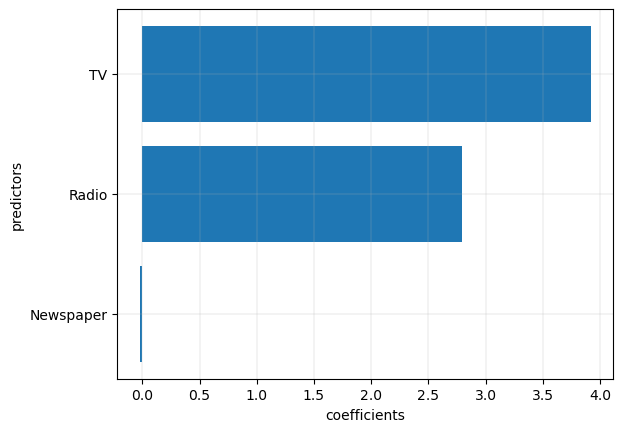

In [6]:
fig, ax = plt.subplots()
ax.barh(predictors, coefficients, align='center')
ax.grid(linewidth=0.2)
ax.set_xlabel('coefficients')
ax.set_ylabel('predictors')
plt.show()

In [7]:
#t-test calculator
def get_t(arr):
    means = np.abs(arr.mean(axis=0))
    stds = arr.std(axis=0)
    return np.divide(means, stds)

In [8]:
coef_dist = []
numboot = 1000

for i in range(numboot):
    df_new = df.sample(frac=1, replace=True)
    
    x = df.drop('Sales', axis=1)
    y = df['Sales']
    
    x_scaled = scaler.fit_transform(x)
    lreg.fit(x_scaled, y)
    
    coef_dist.append(lreg.coef_)

coef_dist = np.array(coef_dist)

In [9]:
tt = get_t(coef_dist)
n = df.shape[0]

In [10]:
tt_dict = dict(zip(df.columns[:-1], tt))
predictors, tvalues = list(zip(*sorted(tt_dict.items(),key=lambda x:x[1])))

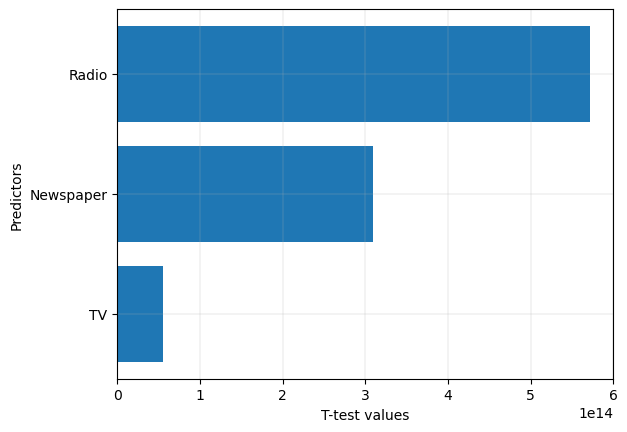

In [11]:
fig, ax = plt.subplots()
ax.barh(predictors,tvalues, align='center')
ax.grid(linewidth=0.2)
ax.set_xlabel("T-test values")
ax.set_ylabel("Predictors")
plt.show()

In [12]:
#p-value calculator using scipy.stats T-distribution function
from scipy import stats
pval = stats.t.sf(tt, n-1)*2
# here we use sf i.e 'Survival function' which is 1 - CDF of the t distribution.
# We also multiply by two because its a two tailed test.

#since p values are in reverse order, find confidence
conf = 1 - pval

In [13]:
conf_dict = dict(zip(df.columns[:-1], conf))
predictors, confs = list(zip(*sorted(conf_dict.items(), key=lambda x: x[1])))

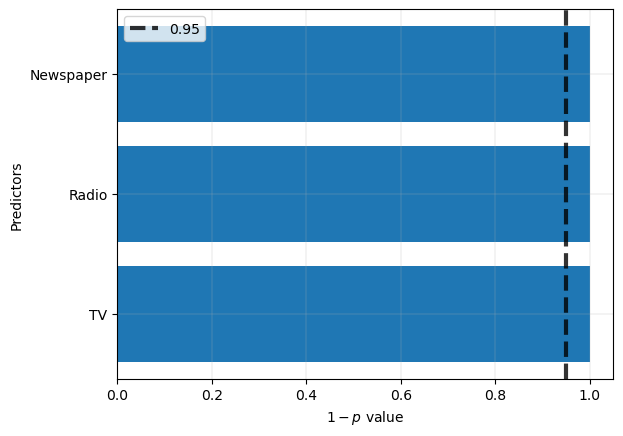

In [14]:
fig, ax = plt.subplots()

ax.barh(predictors, confs, align='center')
ax.grid(linewidth=0.2)
ax.axvline(x=0.95,linewidth=3,linestyle='--', color = 'black',alpha=0.8,label = '0.95')
ax.set_xlabel("$1-p$ value")
ax.set_ylabel("Predictors")
ax.legend()
plt.show()